<a href="https://colab.research.google.com/github/guiPython/Visualiza-o-de-Dados-UFABC-2023-/blob/main/Pratica_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Leitura e configuração do ambiente

In [ ]:
import pandas as pd

csv_git_url = "https://raw.githubusercontent.com/guiPython/Visualiza-o-de-Dados-UFABC-2023-/main/VIS_Pr_01_Vendas.csv"

data = pd.read_csv(csv_git_url, sep=",", encoding = "ISO-8859-1")

Questão 01

In [ ]:
"Devemos agrupar por região somando o total de profit e vendas e ainda fazer o calculo médio de desconto"

data.groupby(["Region"]).agg({"Profit":"sum", "Sales":"sum", "Discount":"mean"})

,Profit,Sales,Discount
Region,,,
Central,39706.3625,501239.8908,0.240353
East,91522.7800,678781.2400,0.145365
South,46749.4303,391721.9050,0.147253
West,108418.4489,725457.8245,0.109335


Questão 02

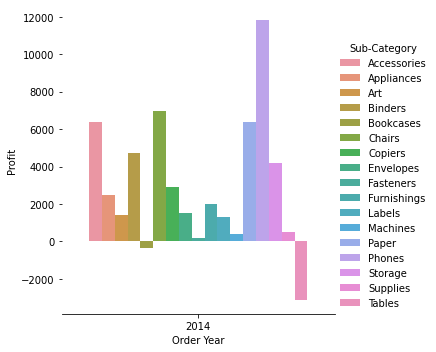

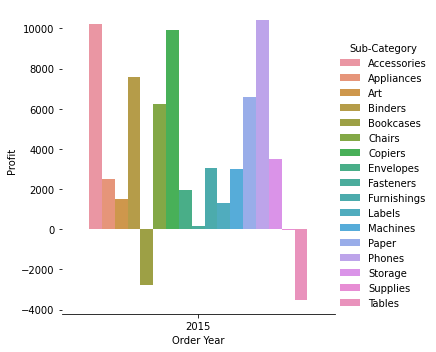

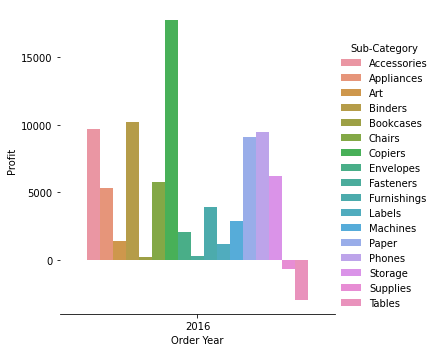

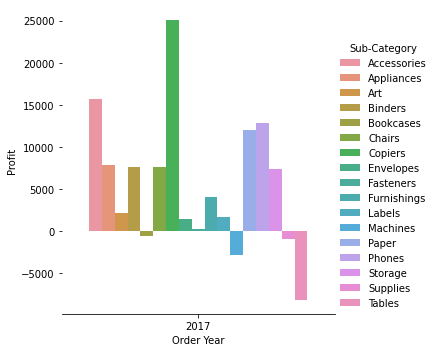

In [ ]:
import seaborn as sns

data[["Order Day", "Order Month", "Order Year"]] = data["Order Date"].str.split("/", expand = True)

grouped = data.groupby(["Order Year", "Sub-Category"]).agg({"Profit": "sum"})

question2_data = grouped.reset_index()
years = question2_data["Order Year"]

for year in sorted(set(years)):
  filtered = question2_data[question2_data["Order Year"] == year]
  plot = sns.catplot(data=filtered, kind="bar", x="Order Year", y="Profit", hue="Sub-Category")
  plot.despine(left=True)


Questão 03

In [69]:
def eval_class(value: float) -> str:
  if value >= 0.25: return "A"
  elif value >= 0.2: return "B"
  elif value >= 0.15: return "C"
  elif value >= 0.1: return "D"
  return "E"

data["Class"] = data["Profit"] / (data["Sales"] - data["Discount"])
data["Class"] = data["Class"].apply(lambda value: eval_class(value))

grouped = data.groupby(["Class", "Segment"]).agg({"Customer ID":"nunique"})
question3_data = grouped.reset_index()

question3_data

,Class,Segment,Customer ID
0,A,Consumer,397
1,A,Corporate,230
2,A,Home Office,147
3,B,Consumer,124
4,B,Corporate,74
5,B,Home Office,49
6,C,Consumer,154
7,C,Corporate,89
8,C,Home Office,49
9,D,Consumer,244
